In [32]:
# %load init.py
#Init
import sys, os
if __package__ is None:
	import sys, os
	sys.path.append(os.path.realpath("../../"))
from CMS_SURF_2016.utils.callbacks import SmartCheckpoint
from CMS_SURF_2016.utils.callbacks import OverfitStopping
name = "lstm_benchmark"
max_features = 20000
max_length = 80
embedding_dim = 256
overfit_stop = OverfitStopping(patience=3, verbose=1);
checkpoint = SmartCheckpoint(name,
    monitor='val_acc',
    verbose=1,
    save_best_only=True)


Sucessfully loaded history at SmartCheckpoint/lstm_benchmark_history.json


In [33]:
# %load get_data.py
#Get_Data
from keras.datasets import imdb
from keras.preprocessing import sequence
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
X_train = sequence.pad_sequences(X_train, max_length)
X_test = sequence.pad_sequences(X_test, max_length)
#X_train = X_train[0:5000]
#X_test = X_test[0:1000]
#y_train = y_train[0:5000]
#y_test = y_test[0:1000]
print(X_train)

Loading data...
[[ 360    7   19 ...,  256   82    7]
 [   6  102   37 ...,    5 1324    7]
 [ 853    6   51 ...,   28 1872   43]
 ..., 
 [  19 1174   17 ...,  546 2244    7]
 [  10 1972   49 ...,   13 1053    7]
 [  69  138    7 ...,   51   91    7]]


In [34]:
y_train.shape

(20000,)

In [35]:
# %load compile.py
#Compile
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=max_length, dropout=0.2))
model.add(LSTM(embedding_dim, dropout_W=0.2, dropout_U=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

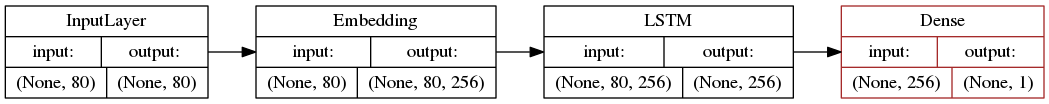

In [36]:
from keras.utils.visualize_util import plot
dot = plot(model, to_file='model3.png', show_shapes=True, show_layer_names=False)
from IPython.display import Image
Image("model3.png")

In [37]:
# %load train.py
#Train
batch_size = 128
epochs = 10
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    nb_epoch=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[overfit_stop,checkpoint])

Train on 20000 samples, validate on 5000 samples
Sucessfully loaded weights at SmartCheckpoint/lstm_benchmark_weights.hdf5
Epoch 1/10
20000/20000 [==============================] - 20s - loss: 0.2263 - acc: 0.9126 - val_loss: 0.4715 - val_acc: 0.8154
Epoch 2/10
20000/20000 [==============================] - 20s - loss: 0.1730 - acc: 0.9351 - val_loss: 0.5737 - val_acc: 0.8148
Epoch 3/10
20000/20000 [==============================] - 20s - loss: 0.1391 - acc: 0.9496 - val_loss: 0.6795 - val_acc: 0.8072
Epoch 4/10
19968/20000 [============================>.] - ETA: 0s - loss: 0.1179 - acc: 0.9591Epoch 00003: overfit stopping
Epoch 00018: val_acc did not improve
20000/20000 [==============================] - 20s - loss: 0.1178 - acc: 0.9591 - val_loss: 0.5390 - val_acc: 0.8052


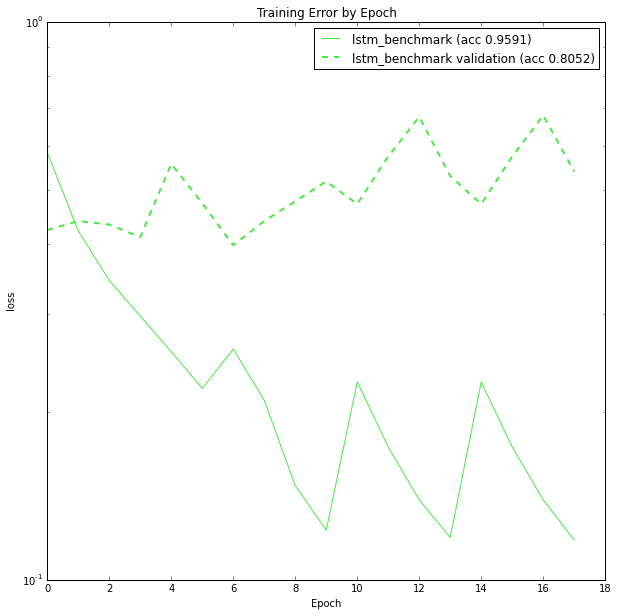

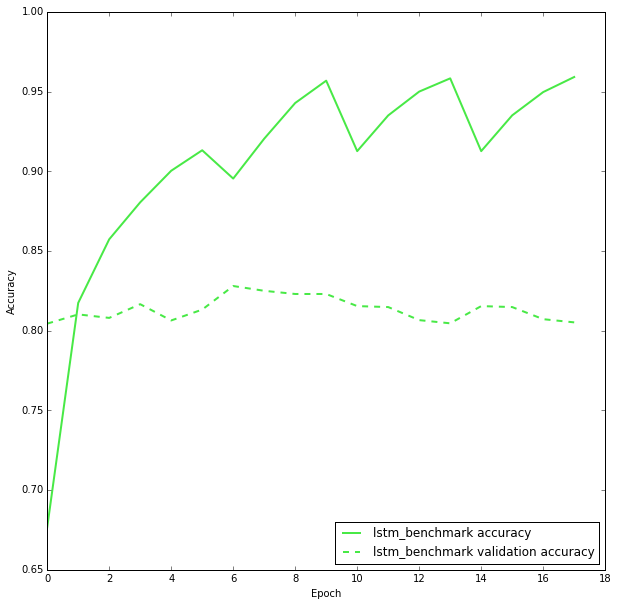

In [38]:
# %load view.py
%matplotlib inline
#View
from CMS_SURF_2016.utils.metrics import plot_history
import json
from keras.callbacks import History
if 'checkpoint' in locals():
    hist = checkpoint.histobj
    plot_history([("lstm_benchmark",hist)]);
else:
    print("Must initialize first")

In [39]:
type(model.layers[0].input)

theano.tensor.var.TensorVariable